# Examen Supletorio ITQ Machine Elerarning

## 01 - 1.25pt
- Crear un array de NumPy de dimensiones 5x5, con números enteros aleatorios en el rango [-40, 40]
- Hacer los siguientes reemplazos en orden
    - Reemplazar todos los valores multiplos de 3 por 1
    - Reemplazar todos los valores pares positivos por 0
    - Reemplazar todos los valores pares negativos por Nan
- Averiguar cuantos elementos tienen Nan por fila

In [26]:
import numpy as np

In [27]:
# Usamos .astype(float) para que nos permita observar valores NaN más adelante
array = np.random.randint(-40, 41, size=(5, 5)).astype(float)

print("Array original:\n", array)

# 1. Hacer los reemplazos en orden
# Reemplazar múltiplos de 3 por 1
# Usamos el operador módulo %
array[array % 3 == 0] = 1

# 2.Reemplazar valores pares positivos por 0
# Un número es par si su resto al dividir por 2 es 0, y positivo si es > 0
array[(array % 2 == 0) & (array > 0)] = 0

# 3.Reemplazar valores pares negativos por NaN
# Par si el resto es 0, y negativo si es < 0
array[(array % 2 == 0) & (array < 0)] = np.nan

print("\nArray después de los reemplazos:\n", array)

# 4. Averiguar cuántos elementos tienen NaN por fila
# np.isnan(array) devuelve una matriz de booleanos, sumamos sobre el eje 1 (filas)
nan_por_fila = np.isnan(array).sum(axis=1)

print("\nCantidad de NaNs por fila:")
for i, total in enumerate(nan_por_fila):
    print(f"Fila {i}: {total} elementos NaN")

Array original:
 [[-17.  34.  31.  -5.  -3.]
 [-16. -23.  25.  13.  -6.]
 [ 39.  20.   0.  -8.  27.]
 [ -8. -27. -20.   7. -21.]
 [-33. -34.  26. -24.  -8.]]

Array después de los reemplazos:
 [[-17.   0.  31.  -5.   1.]
 [ nan -23.  25.  13.   1.]
 [  1.   0.   1.  nan   1.]
 [ nan   1.  nan   7.   1.]
 [  1.  nan   0.   1.  nan]]

Cantidad de NaNs por fila:
Fila 0: 0 elementos NaN
Fila 1: 1 elementos NaN
Fila 2: 1 elementos NaN
Fila 3: 2 elementos NaN
Fila 4: 2 elementos NaN


## 02 - 1.25pt
- Escribe una función que cada vez que se le invoque devuelva el factorial del siguiente número entero, empezando por 1, hasta cualquier número infinito

In [5]:
import math

In [6]:
class fact_gen:
    def __init__(self):# Inicializamos el contador en 1       
        self.n = 1
        
    def __iter__(self):# Esto permite que el objeto sea reconocido como un iterable
        return self
        
    def __next__(self):# Esta función se ejecuta cada vez que el test hace 'next(g)'
        resultado = math.factorial(self.n)
        self.n += 1 # Guardamos el estado para la próxima vez
        return resultado

In [7]:
# Test Use Case
expected_output = [1, 2, 6, 24, 120, 720, 5040, 40320]

g = fact_gen()  # This calls your function named fact_gen
output = [next(g) for n in range(len(expected_output))]

display(expected_output)
display(output)

assert(expected_output == output) # This will fail if the list is wrong

[1, 2, 6, 24, 120, 720, 5040, 40320]

[1, 2, 6, 24, 120, 720, 5040, 40320]

## 03 - 1.25pt
- Escribir una función que reciba un Dataframe, en la columna "name" convierta el primer carácter de cada nombre a mayúsculas.

In [10]:
import pandas as pd

In [11]:
def capitalize_name(df):# Accedemos a la columna 'name' y aplicamos capitalize
    df['name'] = df['name'].str.capitalize()
    return df

In [12]:
# Test Use Case
dataframe = pd.DataFrame({
    'name': ['tamayo','tanjiro','inosuke', 'zenitsu', 'nezuko'],
    'date_of_birth ': ['13/01/2002','18/03/1999','21/11/1998','10/10/2002','05/04/1997'],
    'age': [18.5, 21.2, 22.5, 22, 23]
})

expected_output = pd.DataFrame({
    'name': ['Tamayo', 'Tanjiro', 'Inosuke', 'Zenitsu', 'Nezuko'],
    'date_of_birth ': ['13/01/2002','18/03/1999','21/11/1998','10/10/2002','05/04/1997'],
    'age': [18.5, 21.2, 22.5, 22, 23]
})

output = capitalize_name(dataframe) # This calls your function capitalize_name

display(expected_output)
display(output)

assert(expected_output.equals(output)) # This will fail if result is not as expected

,name,date_of_birth,age
0,Tamayo,13/01/2002,18.5
1,Tanjiro,18/03/1999,21.2
2,Inosuke,21/11/1998,22.5
3,Zenitsu,10/10/2002,22.0
4,Nezuko,05/04/1997,23.0


,name,date_of_birth,age
0,Tamayo,13/01/2002,18.5
1,Tanjiro,18/03/1999,21.2
2,Inosuke,21/11/1998,22.5
3,Zenitsu,10/10/2002,22.0
4,Nezuko,05/04/1997,23.0


## 04 - 1.25pt
- 200 personas hacen una review de una película, dándole una puntuación de 0.0 a 5.0 a dicha película
- Crear una lista aleatoria con las posibles puntuaciones, es decir, 200 puntuaciones entre 0.0 y 5.0
- Discretizar dichas puntuaciones en 4 categorias [muy mala, mala, buena, excelente], los límites de cada categoría son a libre elección
- Discretizar dichas puntuaciones en 5 categorías distribuidas con rangos homogéneos (similar cantidad de valores en cada categoría)
- Mostrar las categorías creadas y cuantos elementos hay en cada una de ellas

In [13]:
import pandas as pd
import numpy as np

In [17]:
# 1. Crear una lista aleatoria de 200 puntuaciones entre 0.0 y 5.0
np.random.seed(42) # Para que los resultados sean replicables
puntuaciones = np.random.uniform(0.0, 5.0, 200)

# Convertimos a Series para facilitar el manejo con Pandas
df_reviews = pd.DataFrame(puntuaciones, columns=['puntuacion'])

# 2. Discretizar en 4 categorías con límites a libre elección
# Definimos los límites: [0-1.5, 1.5-3.0, 3.0-4.0, 4.0-5.0]
bins_fijos = [0, 1.5, 3.0, 4.0, 5.0]
labels_4 = ['muy mala', 'mala', 'buena', 'excelente']

df_reviews['cat_4'] = pd.cut(df_reviews['puntuacion'], bins=bins_fijos, labels=labels_4, include_lowest=True)

# 3. Discretizar en 5 categorías con rangos homogéneos (qcut)
# qcut divide los datos para que cada grupo tenga aproximadamente la misma cantidad de elementos
df_reviews['cat_5_homogeneas'] = pd.qcut(df_reviews['puntuacion'], q=5)

# 4. Mostrar las categorías creadas y cuántos elementos hay en cada una
print("--- Conteo Categorías (4 niveles - Límites definidos) ---")
print(df_reviews['cat_4'].value_counts().sort_index())

print("\n--- Conteo Categorías (5 niveles - Rangos homogéneos) ---")
print(df_reviews['cat_5_homogeneas'].value_counts().sort_index())

--- Conteo Categorías (4 niveles - Límites definidos) ---
cat_4
muy mala     66
mala         56
buena        36
excelente    42
Name: count, dtype: int64

--- Conteo Categorías (5 niveles - Rangos homogéneos) ---
cat_5_homogeneas
(0.0266, 0.923]    40
(0.923, 1.701]     40
(1.701, 2.973]     40
(2.973, 4.022]     40
(4.022, 4.934]     40
Name: count, dtype: int64


## 05 - 5pt

El conjunto de datos "estaciones_bici.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web de la empresa municipal Valenbici, dedicada al alquiler de bicicletas en Valencia.

Los datos recabados de este servicio web son de mediciones cada 10 minutos de las estaciones:

https://valencia.opendatasoft.com/explore/dataset/valenbisi-disponibilitat-valenbisi-dsiponibilidad/information/

Cada estación está compuesta por un número variable de bornetas (total) donde se pueden anclar las bicicletas. Los datos obtenidos de cada estación (registros) refleja el número de bornetas libres (free) y el número de bicicletas disponibles (available).

#### Columnas para trabajar:
- station: id de la estación
- total: número total de bornetas
- updated: timestamp del estado en de bicis en la estación
- available: número de bicis disponibles

#### Preguntas
1. Carga de datos de csv (estaciones_bici.csv) en un DataFrame
2. ¿Cuál es el rango temporal del dataset? Obtención del número de estaciones que tienen un total de 30 bornetas
3. Número de estación con la media más alta de bicis disponibles
4. Realizar el histograma de bicis disponibles de la estación del punto anterior
5. Realizar gráfica con  la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

In [54]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [72]:
# Añadimos sep=';' para que reconozca las columnas correctamente
df = pd.read_csv('res/estaciones_bici.csv', sep=';')

# Ahora sí, el dataset se verá ordenado como en Excel
df.head()

,Unnamed: 0,_id,available,connected,download_date,station,free,open,ticket,total,updated
0,0,5c6050a42554172704fccdc0,9,1,2019-02-10 17:25:37.787,64,11,1,0,20,2019-02-10 17:21:13.000
1,1,5c6050a42554172704fccdc1,6,1,2019-02-10 17:25:37.787,73,14,1,1,20,2019-02-10 17:24:13.000
2,2,5c605be225541729b7d50885,20,1,2019-02-10 18:13:39.827,63,0,1,1,20,2019-02-10 18:09:16.000
3,3,5c605be225541729b7d50886,6,1,2019-02-10 18:13:39.827,64,14,1,0,20,2019-02-10 18:12:15.000
4,4,5c605be225541729b7d50887,9,1,2019-02-10 18:13:39.827,65,10,1,1,19,2019-02-10 18:09:16.000


In [73]:
# 2. ¿Cuál es el rango temporal del dataset?
# Ahora sí encontrará la columna 'updated'
df['updated'] = pd.to_datetime(df['updated'])
rango_temporal = df['updated'].max() - df['updated'].min()
print(f"Rango temporal: {rango_temporal}")

Rango temporal: 1 days 06:21:03


In [74]:
# 2.b Obtención del número de estaciones que tienen un total de 30 bornetas
estaciones_30 = df[df['total'] == 30]['station'].nunique()
print(f"Número de estaciones con 30 bornetas: {estaciones_30}")

Número de estaciones con 30 bornetas: 11


In [75]:
# 3. Número de estación con la media más alta de bicis disponibles
estacion_top_media = df.groupby('station')['available'].mean().idxmax()
print(f"Estación con la media más alta: {estacion_top_media}")

Estación con la media más alta: 50


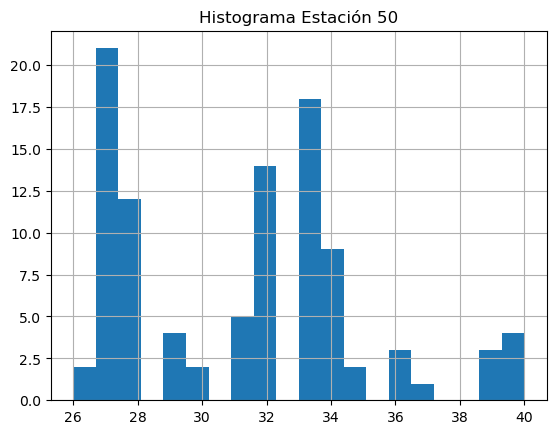

In [76]:
# 4. Realizar el histograma de la estación anterior
df_top = df[df['station'] == estacion_top_media]
df_top['available'].hist(bins=20)
plt.title(f'Histograma Estación {estacion_top_media}')
plt.show()

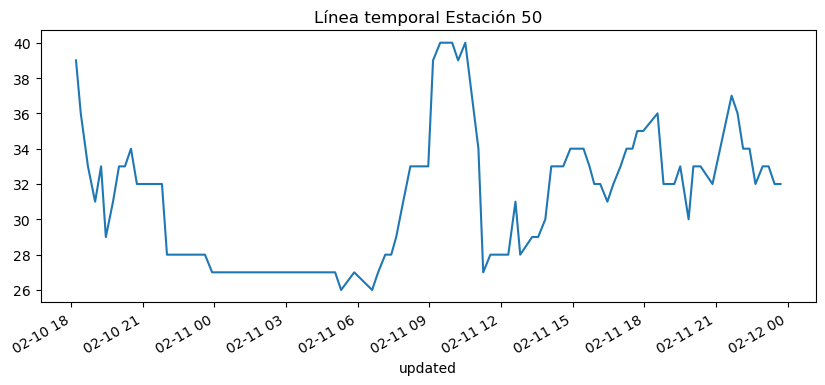

In [77]:
# 5. Gráfica temporal 
df_top = df_top.set_index('updated').sort_index()
df_top['available'].plot(figsize=(10, 4))
plt.title(f'Línea temporal Estación {estacion_top_media}')
plt.show()